<a href="https://colab.research.google.com/github/Dywinar/dz3_clasificator/blob/main/kNN_hometask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

В рамках этого задания вам предстоить подобрать оптимальное число соседей для алгоритма kNN. Датасет здесь будет сгенерирован с помощью специальной функции datasets.make_classification из библиотеки scikit-learn. Часть кода уже написана, её рекомендуется не изменять, а только запустить код в ячейках. Собственно, вам требуется подобрать такое число соседей k, чтоб вы прошли валидацию в соответствующей ячейке "Валидация модели". Очень полезно будет, если вы посмотрите на питон-ноутбук, ссылка на который в конце конспекта к этому вебинару или же посмотрите на то, как подобное исследование проводит преподаватель на вебинаре. Успехов!

Код с вебинара: https://colab.research.google.com/drive/11oGsSE5vcSMdMkGmKRSqKhLEb4TEvwf3

# Импорт библиотек

In [ ]:
!pip install scikit-plot
import scikitplot as skplt

In [75]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Работа с данными

In [76]:
hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50,
    n_classes=3,
    n_redundant=50,
    n_clusters_per_class=1,
    random_state=42,
)

In [77]:
X_train, X_test, y_train, y_test = train_test_split( StandardScaler().fit_transform(hard_problem[0]),
    hard_problem[1],
    test_size=0.3,
    random_state=1,
)

# Обучение модели

Обучим модель с k=8:

In [78]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [79]:
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.7333333333333333

In [80]:
ac = []
for k in range(1,70):
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train, y_train)
  ac.append([k,accuracy_score(y_test, clf.predict(X_test))])

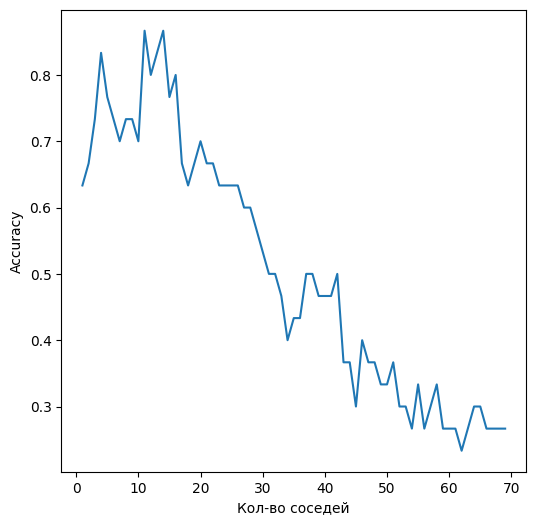

In [81]:
plt.figure(figsize=(6,6))
plt.plot(range(1,70), [i[1] for i in ac])
plt.xlabel('Кол-во соседей')
plt.ylabel('Accuracy')
plt.show()

# Обучение модели с лучшим числом соседей k:

In [82]:
k_optim = max(ac, key=lambda x: x[1])[0]

In [83]:
clf = KNeighborsClassifier(n_neighbors=k_optim)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [84]:
y_pred = clf.predict(X_test)

# Валидация модели

In [85]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


In [86]:
print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.8, "попробуйте изменить следующие параметры: penalty, solver"

print('Хорошая работа!')

Test accuracy: 0.86667
Хорошая работа!


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

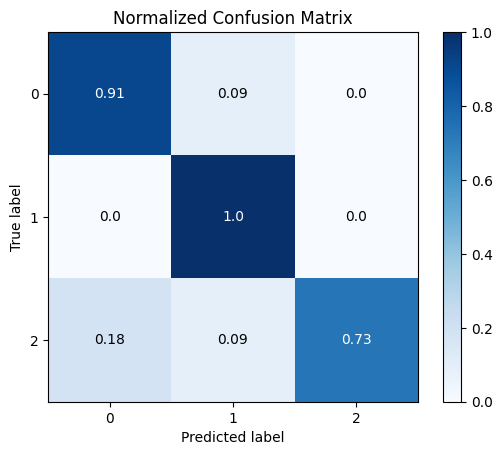

In [87]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.80      1.00      0.89         8
           2       1.00      0.73      0.84        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.89      0.87      0.86        30

